# Lab | Revisiting Machine Learning Case Study

- In this lab, you will use `learningSet.csv` file which you already have cloned in today's activities. 

### Instructions

Complete the following steps on the **categorical columns** in the dataset:

- Check for null values in all the columns
- Exclude the following variables by looking at the definitions. Create a new empty list called `drop_list`. We will append this list and then drop all the columns in this list later:
    - `OSOURCE` - symbol definitions not provided, too many categories
    - `ZIP CODE` - we are including state already
- Identify columns that over 85% missing values
- Remove those columns from the dataframe
- Reduce the number of categories in the column `GENDER`. The column should only have either "M" for males, "F" for females, and "other" for all the rest
    - Note that there are a few null values in the column. We will first replace those null values using the code below:

    ```python
    print(categorical['GENDER'].value_counts())
    categorical['GENDER'] = categorical['GENDER'].fillna('F')
    ```


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('learningSet.csv')
display(data.head(), data.shape)

/var/folders/w7/7cfd14hn02g0d126w5q47rqw0000gn/T/ipykernel_9094/4026864892.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


(95412, 481)

#### Standard column names

In [3]:
#cols = []

#for c in data.columns:
#    cols.append(c.lower().replace(" ", "_"))

#data.columns = cols
#data.columns

#### Spliting numerical-categorical columns

In [4]:
data.dtypes

ODATEDW       int64
OSOURCE      object
TCODE         int64
STATE        object
ZIP          object
             ...   
MDMAUD_R     object
MDMAUD_F     object
MDMAUD_A     object
CLUSTER2    float64
GEOCODE2     object
Length: 481, dtype: object

In [5]:
cat_data = data.select_dtypes(include = 'object')

display(cat_data.head(), cat_data.shape)

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,...,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,...,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,...,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A


(95412, 74)

#### Check for null values in all the columns

In [6]:
cat_data.isna().sum()

OSOURCE       0
STATE         0
ZIP           0
MAILCODE      0
PVASTATE      0
           ... 
RFA_2A        0
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
GEOCODE2    132
Length: 74, dtype: int64

In [7]:
# Filtering out columns without NaN values
nan_counts = cat_data.isna().sum()
nan_counts = nan_counts[nan_counts > 0]

nan_counts

GEOCODE2    132
dtype: int64

#### Exclude the following variables by looking at the definitions.

Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

    - OSOURCE - symbol definitions not provided, too many categories
    - ZIP CODE - we are including state already

In [8]:
# Finding columns with 'zip' in their title
zip_cols = [col for col in data.columns if 'ZIP' in col.lower()]
print(zip_cols)

[]


In [9]:
drop_list = ['OSOURCE', 'ZIP']
drop_list

['OSOURCE', 'ZIP']

#### Identify columns that over 85% missing values --> only categorical?

In [10]:
# Columns with empty rows
cat_data.columns[cat_data.isna().any()].tolist()

# The .tolist() method is used to convert an array or a pandas Series into a Python list.

['GEOCODE2']

In [11]:
# Calculating percentages
missing_percent = pd.DataFrame(cat_data.isna().sum() / len(cat_data) * 100, columns=['percent_missing']).reset_index().rename(columns={'index': 'column_name'})
missing_percent.columns = ['column_name', 'missing_fraction']
#missing_percent = cat_data.isna().mean() * 100
missing_percent

,column_name,missing_fraction
0,OSOURCE,0.000000
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.000000
4,PVASTATE,0.000000
...,...,...
69,RFA_2A,0.000000
70,MDMAUD_R,0.000000
71,MDMAUD_F,0.000000
72,MDMAUD_A,0.000000


In [12]:
# Selecting all columns with >85% of missing values --> none in cat, multiple in data
columns_above_threshold = missing_percent[missing_percent['missing_fraction']>0.85]
print(len(columns_above_threshold['column_name']))

#missing_percent[missing_percent > 85]

0


#### Remove those columns from the dataframe

In [13]:
# There is none in categorical.

#### Reduce the number of categories in the column `GENDER`.
The column should only have either "M" for males, "F" for females, and "other" for all the rest.


Note that there are a few null values in the column. We will first replace those null values using the code below:

    ```python
    print(categorical['GENDER'].value_counts())
    categorical['GENDER'] = categorical['GENDER'].fillna('F')
    ```

In [14]:
cat_data['GENDER'].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [15]:
# Filling null values as indicated
cat_data['GENDER'] = cat_data['GENDER'].fillna('F')

cat_data['GENDER'].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [16]:
# Reducing number of categories
cat_data['GENDER'] = cat_data["GENDER"].replace({" ": "other", "U": "other", "J": "other", "C": "other", "A": "other", "" : "other"})

# print the value counts to verify the result
cat_data["GENDER"].value_counts()

F        51277
M        39094
other     5041
Name: GENDER, dtype: int64

In [17]:
cat_data.to_csv('categorical.csv')

# Lab | Feature engineering

In this lab, you will use learningSet.csv file which you have already cloned in the previous activities.

#### Instructions
Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

    - Check for null values in the numerical columns.
    - Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
    - Use appropriate EDA technique where ever necessary.

#### Selecting numerical columns

In [18]:
num_data = data.select_dtypes(np.number)

num_data.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


#### Check for null values in the numerical columns.

In [19]:
num_data.isna().sum()

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
NUMCHLD     83026
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 407, dtype: int64

In [20]:
# Filtering out columns without NaN values
nan_counts = num_data.isna().sum()
nan_counts = nan_counts[nan_counts > 0]

nan_counts

AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
            ...  
RAMNT_23    87553
RAMNT_24    77674
NEXTDATE     9973
TIMELAG      9973
CLUSTER2      132
Length: 91, dtype: int64

#### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

#### Use appropriate EDA technique where ever necessary.

- Geocode

In [21]:
#### Geocode2 is CATEGORICAL
cat_data['GEOCODE2']

0        C
1        A
2        C
3        C
4        A
        ..
95407    C
95408    A
95409    B
95410    A
95411    C
Name: GEOCODE2, Length: 95412, dtype: object

In [22]:
cat_data['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: GEOCODE2, dtype: int64

In [23]:
# Adding " " and NAN to biggest value count ('A')
cat_data['GEOCODE2'] = cat_data['GEOCODE2'].fillna('A')
cat_data['GEOCODE2'] = cat_data['GEOCODE2'].replace({" " : 'A'})
cat_data['GEOCODE2'].value_counts()


A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

- Wealth1



WEALTH1 Wealth Rating
HIT MOR Flag # HIT (Mail Order Response)
Indicates total number of known times the donor has
responded to a mail order offer other than PVA's.

In [24]:
num_data['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [25]:
num_data['WEALTH1'].describe()

count    50680.000000
mean         5.345699
std          2.742490
min          0.000000
25%          3.000000
50%          6.000000
75%          8.000000
max          9.000000
Name: WEALTH1, dtype: float64

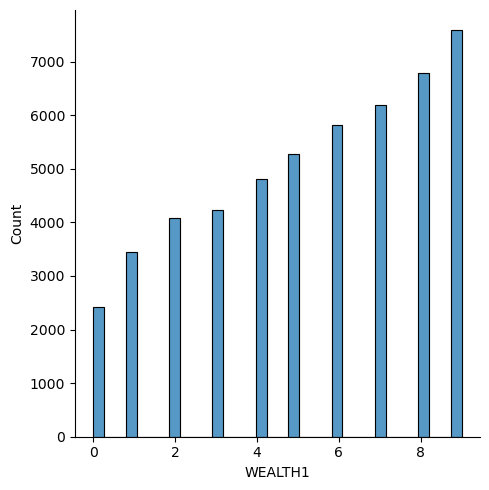

In [26]:
sns.displot(num_data['WEALTH1'])
plt.show()

In [27]:
# Nothing much to do, no extra info
num_data['WEALTH1'] = num_data['WEALTH1'].fillna(0)

num_data['WEALTH1'].value_counts(dropna=False)

0.0    47145
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
Name: WEALTH1, dtype: int64

- ADI

In [28]:
num_data['ADI'].isna().sum()

132

In [29]:
num_data['ADI'].value_counts(dropna=False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

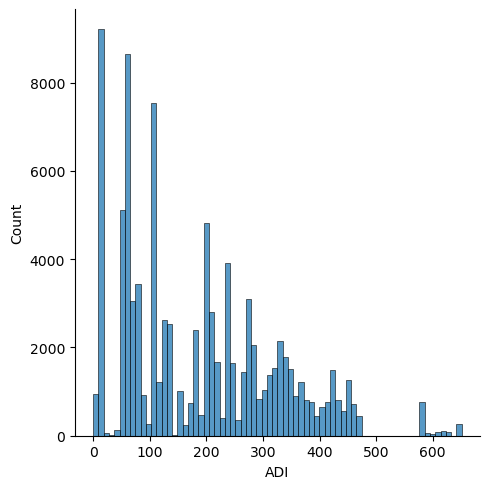

In [30]:
sns.displot(num_data['ADI'])
plt.show()

In [31]:
# ADI code - no extra information provided in docs --> add to most frequent value
num_data['ADI'] = num_data['ADI'].fillna('13.0')

- DMA

In [32]:
num_data['DMA'].isna().sum()

132

In [33]:
num_data['DMA'].value_counts(dropna=False)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

In [34]:
num_data['DMA'].describe()

count    95280.000000
mean       664.004072
std        116.363600
min          0.000000
25%        561.000000
50%        635.000000
75%        801.000000
max        881.000000
Name: DMA, dtype: float64

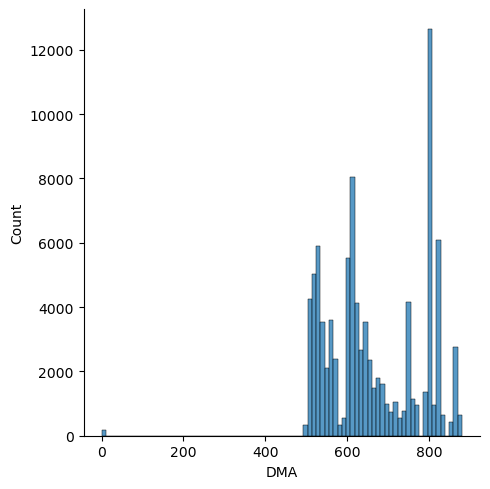

In [35]:
sns.displot(num_data['DMA'])
plt.show()

In [36]:
num_data['DMA'] = num_data['DMA'].fillna('803.0')

- MSA

In [37]:
num_data['MSA'].isna().sum()

132

In [38]:
num_data['MSA'].value_counts(dropna=False)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

In [39]:
num_data['MSA'].describe()

count    95280.000000
mean      3527.744102
std       2863.904737
min          0.000000
25%        520.000000
50%       3350.000000
75%       5960.000000
max       9360.000000
Name: MSA, dtype: float64

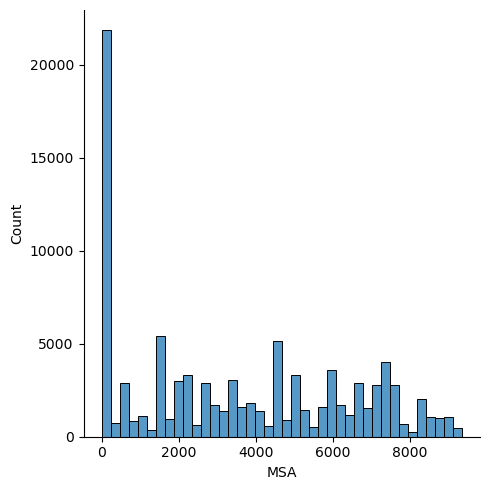

In [40]:
sns.displot(num_data['MSA'])
plt.show()

In [41]:
num_data['MSA'] = num_data['MSA'].fillna('0.0')

In [42]:
num_data.shape

(95412, 407)

In [43]:
num_data.columns

Index(['ODATEDW', 'TCODE', 'DOB', 'AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'HIT',
       'MBCRAFT', 'MBGARDEN',
       ...
       'FISTDATE', 'NEXTDATE', 'TIMELAG', 'AVGGIFT', 'CONTROLN', 'TARGET_B',
       'TARGET_D', 'HPHONE_D', 'RFA_2F', 'CLUSTER2'],
      dtype='object', length=407)

In [44]:
# Filtering out columns without NaN values
nan_counts = num_data.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
#pd.set_option('display.max_rows', 100)
pd.set_option('display.max_rows', 100)
display(nan_counts.head(), "Columns with NaN values: ", len(nan_counts))

AGE         23665
NUMCHLD     83026
INCOME      21286
MBCRAFT     52854
MBGARDEN    52854
dtype: int64

'Columns with NaN values: '

87

In [45]:
drop_list = []

In [46]:
col_to_drop = ["ADATE", "RDATE", "RAMNT", "NUMCHILD","MB","MAG", "PUB"]

In [47]:
# loop through each column in the dataframe
for col in num_data.columns:
    # check if any value in col_to_drop is a substring of the column name
    if any(val in col for val in col_to_drop):
        # if a match is found, append the column name to drop_list
        drop_list.append(col)

In [48]:
drop_list

['MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_5',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_10',
 'ADATE_11',
 'ADATE_12',
 'ADATE_13',
 'ADATE_14',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'MAXADATE',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_8',
 'RAMNT_9',
 'RAMNT_10',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_13',
 'RAMNT_14',
 'RAMNT_15',
 'RAMNT_16',
 'RAMNT_17',
 'RAMNT_18',
 'RAMNT_19',
 'RAMNT_20',
 'RAMNT_21',
 'RA

In [49]:
len(drop_list)

87

In [50]:
num_data = num_data.drop(columns=drop_list)
num_data

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0.0,0,0,39,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0,15,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0,20,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0,23,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1,28,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,0.0,0,14,36,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,1.0,7.0,9.0,1,0,31,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,0.0,0,0,18,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,NaN,7.0,0.0,0,0,28,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


In [51]:
407-281

126

In [52]:
num_data['AGE'] = num_data["AGE"].fillna(np.mean(num_data['AGE']))
num_data['INCOME'] = num_data['INCOME'].fillna(5.0)
num_data['CLUSTER2'] = num_data['CLUSTER2'].fillna(np.ceil(np.mean(num_data['CLUSTER2'])))

In [53]:
num_data['WEALTH2'] = num_data['WEALTH2'].astype('object')
num_data['WEALTH2'] = num_data['WEALTH2'].fillna('5.0')

In [54]:
num_data['WEALTH2'] = num_data['WEALTH2'].astype('object')
num_data['WEALTH2'] = num_data['WEALTH2'].fillna('5.0')

In [55]:
num_data['TIMELAG'].median()

6.0

In [56]:
num_data['TIMELAG'] = num_data['TIMELAG'].fillna(6.0)

In [57]:
num_data['NEXTDATE'] = num_data['NEXTDATE'].fillna(0)

In [58]:
num_data.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,NaN,5.0,0.0,0,0,39,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.000000,1.0,6.0,9.0,16,0,15,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,61.611649,NaN,3.0,1.0,2,0,20,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.000000,NaN,1.0,4.0,2,0,23,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.000000,1.0,3.0,2.0,60,1,28,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


In [59]:
num_data.to_csv('numerical.csv')

# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will use the dataset 'Healthcare For All' building a model to predict who will donate (TargetB) and how much they will give (TargetD) (will be used for lab on Friday). You will be using `files_for_lab/learningSet.csv` file which you have already downloaded from class.

### Scenario

You are revisiting the Healthcare for All Case Study. You are provided with this historical data about Donors and how much they donated. Your task is to build a machine learning model that will help the company identify people who are more likely to donate and then try to predict the donation amount.

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in the class.  You should continue in the same notebook from Monday.

Here is the list of steps to be followed (building a simple model without balancing the data):

**These steps should have been completed in Monday's labs:**
- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `donors`.
- Check the datatypes of all the columns in the data. 
- Split the data into numerical and catagorical.
- Check for null values in the dataframe. Replace the null values using the methods learned in class.
- Treat the data using techniques learned in class.
 
 
 ### Instructions

**Begin the Modeling here**
- Look critically at the dtypes of numerical and categorical columns and make changes where appropriate.
- Concatenate numerical and categorical back together again for your X dataframe.  Designate the TargetB as y.
  - Split the data into a training set and a test set.
  - Split further into train_num and train_cat.  Also test_num and test_cat.
  - Scale the features either by using MinMax Scaler or a Standard Scaler. (train_num, test_num)
  - Encode the categorical features using One-Hot Encoding or Ordinal Encoding.  (train_cat, test_cat)
      - **fit** only on train data, transform both train and test
      - again re-concatenate train_num and train_cat as X_train as well as test_num and test_cat as X_test
  - Fit a logistic regression model on the training data.
  - Check the accuracy on the test data.

**Note**: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model has changed.


In [50]:
num_data = pd.read_csv('numerical.csv')
cat_data = pd.read_csv('categorical.csv')

In [51]:
pd.set_option('display.max.columns', None)
display("Numerical data: ", num_data.head(2), num_data.shape, "Categorical data: ", cat_data.head(2), cat_data.shape)

'Numerical data: '

,Unnamed: 0,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,0,8901,0,3712,60.0,NaN,5.0,0.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,31,14,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,1,9401,1,5202,46.0,1.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,3,1,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0


(95412, 321)

'Categorical data: '

,Unnamed: 0,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,GRI,IL,61081,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,1,BOA,CA,91326,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A


(95412, 75)

#### Look critically at the dtypes of numerical and categorical columns and make changes where appropriate.

- Numerical

In [52]:
num_data[['TARGET_B','TARGET_D']]

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [53]:
# Changing target B to object
num_data['TARGET_B'] = num_data['TARGET_B'].astype('object')

In [54]:
# Checking percentage of NaN values for columns in cat_data
nulls_percent_df = pd.DataFrame(num_data.isna().sum()/len(num_data)).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

# Displaying all columns that have nulls
display(nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].head())
display(nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].shape)

,column_name,nulls_percentage
5,NUMCHLD,0.870184


(1, 2)

In [55]:
num_data = num_data.drop(['NUMCHLD'], axis = 1)
num_data.shape

(95412, 320)

In [56]:
num_data = num_data.drop(['Unnamed: 0'], axis = 1)

In [57]:
num_data

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,5.0,0.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,31,14,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,3,1,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,

- Categorical

In [58]:
# Filling with NAN empty cells
cat_data = cat_data.apply(lambda x: x.replace(" ", np.NaN))
cat_data = cat_data.drop(['Unnamed: 0'], axis=1)
cat_data.head(3)

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,NaN,NaN,0,NaN,NaN,NaN,NaN,XXXX,T2,36,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,NaN,NaN,0,NaN,NaN,NaN,NaN,XXXX,S1,14,E,H,NaN,NaN,NaN,M,M,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,NaN,NaN,NaN,L1E,NaN,NaN,N1E,N1E,N1E,N1E,NaN,F1E,L,G,X,X,X,A
2,AMH,NC,27017,NaN,NaN,0,NaN,NaN,NaN,NaN,XXXX,R2,43,NaN,U,NaN,NaN,NaN,NaN,M,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,NaN,S4F,S4F,S4F,S4F,S4F,S4F,NaN,S4D,S4D,NaN,NaN,S4D,S4D,S3D,L,E,X,X,X,C


In [59]:
# Checking percentage of NaN values for columns in cat_data
nulls_percent_df = pd.DataFrame(cat_data.isna().sum()/len(cat_data)).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

# Displaying all columns that have nulls
display(nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].head())
display(nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].shape)

,column_name,nulls_percentage
0,OSOURCE,0.009726
3,MAILCODE,0.985337
4,PVASTATE,0.984719
5,NOEXCH,0.000073
6,RECINHSE,0.929747


(64, 2)

In [60]:
# Setting threshold for NaNcolumns >0.80
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.80]
display(columns_above_threshold['column_name'])
display(columns_above_threshold['column_name'].shape)

3     MAILCODE
4     PVASTATE
6     RECINHSE
7        RECP3
8      RECPGVG
9     RECSWEEP
15     CHILD03
16     CHILD07
17     CHILD12
18     CHILD18
21       SOLP3
22       SOLIH
23       MAJOR
24     GEOCODE
25    COLLECT1
26    VETERANS
27       BIBLE
28       CATLG
29       HOMEE
30        PETS
31      CDPLAY
32      STEREO
33    PCOWNERS
34       PHOTO
35      CRAFTS
36      FISHER
37    GARDENIN
38       BOATS
39      WALKER
40    KIDSTUFF
41       CARDS
42      PLATES
Name: column_name, dtype: object

(32,)

In [61]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list,"\n\nNumber of columns to drop: ", len(drop_columns_list))

['MAILCODE', 'PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'SOLIH', 'MAJOR', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES'] 

Number of columns to drop:  32


In [62]:
cat_data = cat_data.drop(drop_columns_list, axis=1)
cat_data.shape

(95412, 42)

In [63]:
display(cat_data.head(), cat_data.shape)

,OSOURCE,STATE,ZIP,NOEXCH,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,GENDER,DATASRCE,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,0,XXXX,T2,36,NaN,NaN,F,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,0,XXXX,S1,14,E,H,M,3,NaN,NaN,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,NaN,NaN,NaN,L1E,NaN,NaN,N1E,N1E,N1E,N1E,NaN,F1E,L,G,X,X,X,A
2,AMH,NC,27017,0,XXXX,R2,43,NaN,U,M,3,NaN,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,NaN,S4F,S4F,S4F,S4F,S4F,S4F,NaN,S4D,S4D,NaN,NaN,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,0,XXXX,R2,44,E,U,F,3,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,NaN,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,NaN,NaN,L,E,X,X,X,C
4,NaN,FL,33176,0,XXXX,S2,16,E,H,F,3,3,NaN,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,NaN,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


(95412, 42)

In [64]:
# OSOURCE
cat_data['OSOURCE'].value_counts()

MBC    4539
SYN    3563
AML    3430
BHG    3324
IMP    2986
       ... 
MDD       1
NRM       1
HDP       1
CRP       1
VIC       1
Name: OSOURCE, Length: 895, dtype: int64

In [65]:
cat_data = cat_data.drop(['OSOURCE'],axis=1)
cat_data.shape

(95412, 41)

In [66]:
# State
df = pd.DataFrame(cat_data['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])
#other_states
def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
cat_data['STATE'] = list(map(clean_state, cat_data['STATE']))

cat_data['STATE'].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

In [67]:
# DOMAIN
cat_data['DOMAIN'] = cat_data['DOMAIN'].fillna('R2')
cat_data['DOMAIN_A'] = list(map(lambda x: x[0], cat_data['DOMAIN']))
cat_data['DOMAIN_B'] = list(map(lambda x: x[1], cat_data['DOMAIN']))
cat_data = cat_data.drop(columns=['DOMAIN'])
cat_data.head(2)

,STATE,ZIP,NOEXCH,MDMAUD,CLUSTER,AGEFLAG,HOMEOWNR,GENDER,DATASRCE,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,61081,0,XXXX,36,NaN,NaN,F,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C,T,2
1,CA,91326,0,XXXX,14,E,H,M,3,NaN,NaN,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,NaN,NaN,NaN,L1E,NaN,NaN,N1E,N1E,N1E,N1E,NaN,F1E,L,G,X,X,X,A,S,1


In [68]:
# Filling NaN (as in lesson 7.01, 7.02)
cat_data['CLUSTER'] = cat_data['CLUSTER'].fillna('40')
cat_data['HOMEOWNR'] = cat_data['HOMEOWNR'].fillna('U')
cat_data['GEOCODE2'] = cat_data['GEOCODE2'].fillna('A')

In [69]:
# Dropping RFA columns (as in lesson 7.01, 7.02)
drop_list=[]
for col_name in cat_data.columns:
    if "RFA" in col_name:
        drop_list.append(col_name) 

In [70]:
drop_list = drop_list + ['MDMAUD','NOEXCH','DATASRCE','MDMAUD','MDMAUD_R', 'MDMAUD_F','MDMAUD_A','ZIP']

In [71]:
drop_list

['RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24',
 'RFA_2R',
 'RFA_2A',
 'MDMAUD',
 'NOEXCH',
 'DATASRCE',
 'MDMAUD',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'ZIP']

In [72]:
cat_data = cat_data.drop(columns=drop_list)

In [73]:
display(cat_data.head(2), cat_data.shape)

,STATE,CLUSTER,AGEFLAG,HOMEOWNR,GENDER,LIFESRC,PEPSTRFL,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,NaN,U,F,NaN,X,C,T,2
1,CA,14,E,H,M,NaN,NaN,A,S,1


(95412, 10)

Gorka (['STATE', 'DOMAIN', 'CLUSTER', 'AGEFLAG', 'HOMEOWNR', 'GENDER',
       'DATASRCE', 'GEOCODE', 'LIFESRC', 'RFA_2R', 'RFA_2A', 'GEOCODE2'])

In [74]:
# Checking percentage of NaN values for remaining columns in cat_data
nulls_percent_df = pd.DataFrame(cat_data.isna().sum()/len(cat_data)).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

# Displaying all columns that have nulls
display(nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].head(29))
display(nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].shape)

,column_name,nulls_percentage
2,AGEFLAG,0.309689
5,LIFESRC,0.566302
6,PEPSTRFL,0.525542


(3, 2)

In [75]:
cat_data=cat_data.drop(['AGEFLAG','LIFESRC','PEPSTRFL'], axis=1)

In [76]:
display(cat_data.head(3), cat_data.shape)

,STATE,CLUSTER,HOMEOWNR,GENDER,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,U,F,C,T,2
1,CA,14,H,M,A,S,1
2,NC,43,U,M,C,R,2


(95412, 7)

#### Concatenate numerical and categorical back together again for your X dataframe.
#### Designate the TargetB as y.

In [77]:
# Concatenating
X = pd.concat([num_data,cat_data],axis=1)
X.shape

(95412, 326)

In [78]:
# Drop TARGET_D as they are correlated
X = X.drop(['TARGET_D'],axis=1)
X.shape

(95412, 325)

In [79]:
y = X['TARGET_B']
X = X.drop(['TARGET_B'], axis=1)
X.shape

(95412, 324)

In [80]:
type(y)

pandas.core.series.Series

In [81]:
y.unique()

array([0, 1], dtype=object)

In [82]:
# Solving issue with encoding (label problem)
y = y.astype(int)

In [83]:
X.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,GEOCODE2,DOMAIN_A,DOMAIN_B
0,8901,0,3712,60.000000,5.0,0.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,31,14,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0,IL,36,U,F,C,T,2
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,3,1,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0,CA,14,H,M,A,S,1
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,2

In [84]:
#X = X.drop(['Unnamed: 0'],axis=1)
#X.head()

#### Split the data into a training set and a test set.
#### Split further into train_num and train_cat.  Also test_num and test_cat.

In [85]:
# Numerical columns were converted to numerical... reconverting to 'object' type
#X[['WEALTH2', 'DMA', 'ADI','MSA']].dtypes

In [86]:
# Converting DMA, ADI, MSA to numerical types 
#X[['WEALTH2','DMA', 'ADI', 'MSA']] = X[['WEALTH2','DMA', 'ADI', 'MSA']].apply(pd.to_numeric, errors='coerce')

In [87]:
X.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,GEOCODE2,DOMAIN_A,DOMAIN_B
0,8901,0,3712,60.000000,5.0,0.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,31,14,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0,IL,36,U,F,C,T,2
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,3,1,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0,CA,14,H,M,A,S,1
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,2

In [88]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [89]:
# Train data
X_train_num = X_train.select_dtypes(np.number) 
X_train_cat = X_train.select_dtypes(object)
# Test data
X_test_num = X_test.select_dtypes(np.number) 
X_test_cat = X_test.select_dtypes(object)

 #### Scale the features either by using MinMax Scaler or a Standard Scaler. (train_num, test_num)


In [90]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
train_num_scaled = scaler.fit_transform(X_train_num)
test_num_scaled = scaler.transform(X_test_num)


#### Encode the categorical features using One-Hot Encoding or Ordinal Encoding.  (train_cat, test_cat)
        - **fit** only on train data, transform both train and test

In [91]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first') # (drop='first') (handle_unknown='ignore')
train_cat_encoded = encoder.fit_transform(X_train_cat)#.toarray()
test_cat_encoded = encoder.transform(X_test_cat)

In [92]:
train_cat_encoded_df = pd.DataFrame(train_cat_encoded.toarray(), columns=encoder.get_feature_names_out(X_train_cat.columns))
test_cat_encoded_df = pd.DataFrame(test_cat_encoded.toarray(), columns=encoder.get_feature_names_out(X_test_cat.columns)) 

#### Again re-concatenate train_num and train_cat as X_train as well as test_num and test_cat as X_test

In [93]:
X_train = pd.concat([pd.DataFrame(train_num_scaled, columns=X_train_num.columns), train_cat_encoded_df], axis=1)
X_test = pd.concat([pd.DataFrame(test_num_scaled, columns=X_test_num.columns), test_cat_encoded_df], axis=1)

#### Fit a logistic regression model on the training data.
#### Check the accuracy on the test data.

        - **Note**: So far we have not balanced the data.


In [94]:
from sklearn.linear_model import LogisticRegression
# create a logistic regression model
classification = LogisticRegression(max_iter= 1000)

# fit the model to the training data
classification.fit(X_train, y_train)

# make predictions on the testing data
y_pred = classification.predict(X_test)
accuracy = classification.score(X_test, y_test)
print("Accuracy on the test data: {:.2f}%".format(accuracy * 100))

Accuracy on the test data: 94.76%


In [98]:
accuracy = classification.score(X_test, y_test)
print("Accuracy on the test data: {:.2f}%".format(accuracy * 100))

Accuracy on the test data: 94.76%


#### Managing imbalance in the dataset

- Check for the imbalance.


In [99]:
y_train = y_train.reset_index().drop(['index'], axis=1)

In [100]:
trainset = pd.concat([pd.DataFrame(y_train), pd.DataFrame(X_train)], axis=1)

In [101]:
trainset=pd.concat([y_train, X_train ], axis=1)

In [102]:
trainset

,TARGET_B,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_2,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_3,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_4,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_5,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,HOMEOWNR_U,GENDER_M,GENDER_other,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,0,0.211470,0.000017,0.236972,0.762887,0.500000,0.666667,0.008299,0.000000,0.313131,0.101010,0.686869,0.060606,0.121212,0.034483,0.555556,0.007153,0.009129,0.007683,1.000000,0.000000,0.000000,0.474747,0.535354,0.757576,0.212121,0.000000,0.020202,0.020202,0.0,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.017544,0.0,0.023256,0.404762,0.500000,0.547619,0.428571,0.535714,0.583333,0.333333,0.363636,0.474747,0.171717,0.131313,0.212121,0.191919,0.131313,0.151515,0.121212,0.060606,0.141414,0.141414,0.353535,0.212121,0.161616,0.282828,0.090909,0.252525,0.212121,0.383838,0.424242,0.232323,0.101010,0.040404,0.616162,0.101010,0.095890,0.222222,0.272308,0.371429,0.777778,0.757576,0.028571,0.222222,0.202020,0.101010,0.000000,0.000000,0.0,0.105167,0.107333,0.230769,0.230769,0.717172,0.292929,0.939394,0.070707,0.000000,0.343434,0.757576,0.595960,0.242424,0.888889,0.121212,0.101010,0.04,0.080808,0.090909,0.212121,0.040404,0.186667,0.434343,0.191919,0.162791,0.141414,0.012346,0.000000,0.010101,0.040404,0.232323,0.757576,0.000000,0.000000,0.525253,0.635294,0.633333,0.229508,0.100,0.161616,0.060606,0.000000,0.111111,0.090909,0.090909,0.000000,0.030303,0.080808,0.808081,0.929293,0.337607,0.327189,0.643587,0.225333,0.220667,0.238000,0.228667,0.068232,0.101010,0.313131,0.131313,0.212121,0.212121,0.050505,0.00,0.000000,0.000000,0.080808,0.333333,0.161616,0.212121,0.161616,0.060606,0.00,0.000000,0.000000,0.414141,0.0707

#### Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model has changed.

In [103]:
from sklearn.utils import resample

category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

In [104]:
category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))

In [105]:
print(category_0_undersampled.shape)
print(category_1.shape)

(3843, 394)
(3843, 394)


In [107]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)

#data_downsampled.isna().sum()/len(data)

In [108]:
X_train_downsampled = data_downsampled.drop(columns=['TARGET_B'])
y_train_downsampled = data_downsampled['TARGET_B']

- Fit a logistic regression model on the training data.

In [109]:
classification = LogisticRegression(max_iter=1000)
classification.fit(X_train_downsampled, y_train_downsampled)

LogisticRegression(max_iter=1000)

In [110]:
accuracy = classification.score(X_test, y_test)
print("Accuracy on the test data: {:.2f}%".format(accuracy * 100))

Accuracy on the test data: 57.29%


- Upsampling (oversampling)

In [111]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [112]:
print(category_0.shape)
print(category_1_oversampled.shape)

(72486, 394)
(72486, 394)


In [113]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [114]:
X_train_upsampled = data_upsampled.drop(columns=['TARGET_B'])
y_train_upsampled = data_upsampled['TARGET_B']

- Fit a logistic regression model on the training data.

In [115]:
classification = LogisticRegression(max_iter=1000)
classification.fit(X_train_upsampled, y_train_upsampled)

/Users/albertlleidaestival/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [116]:
accuracy = classification.score(X_test, y_test)
print("Accuracy on the test data: {:.2f}%".format(accuracy * 100))

Accuracy on the test data: 60.82%
